In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
data = pd.read_csv(r'C:\Users\Ritesh\Downloads\Amazon_Products.csv')
data

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_6572\3971379547.py:1: DtypeWarning: Columns (5,6,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing and Cleaning

In [20]:
data.nunique

<bound method DataFrame.nunique of                                 uniq_id  product_name  \
0      eac7efa5dbd3d667f26eb3d3ab504464           0.0   
1      b17540ef7e86e461d37f3ae58b7b72ac           1.0   
2      348f344247b0c1a935b1223072ef9d8a           2.0   
3      e12b92dbb8eaee78b22965d2a9bbbd9f           NaN   
4      e33a9adeed5f36840ccc227db4682a36           NaN   
...                                 ...           ...   
9999   44d6967f083825a5de36ad4865a65bcd           NaN   
10000  08f0747b6fc6687215ffb994c3a6fb32           NaN   
10001  bf6cc073f8f24e6e338190fa16f6ee9d           3.0   
10002  cd783d0b8b44e631b9788b203eaaefae           4.0   
10003  94d18e86e504bee1e392df7e5738b18a           5.0   

                  manufacturer  price number_available_in_stock  \
0                       Hornby   3.42                     5 new   
1                    FunkyBuys  16.99                       NaN   
2                          ccf   9.99                     2 new   
3           

In [21]:
data.shape

(10004, 895)

In [22]:
data.describe()

,product_name
count,6.000000
mean,2.500000
std,1.870829
min,0.000000
25%,1.250000
50%,2.500000
75%,3.750000
max,5.000000


In [23]:
data.isnull().sum()

uniq_id                          2
product_name                  9998
manufacturer                     9
price                         1437
number_available_in_stock     2502
                             ...  
Unnamed: 890                 10002
Unnamed: 891                 10002
Unnamed: 892                 10002
Unnamed: 893                 10003
Unnamed: 894                 10003
Length: 895, dtype: int64

In [10]:
data = data.drop(['Unnamed: 890 '])
data = data.drop(['Unnamed: 891 '])
data = data.drop(['Unnamed: 892 '])
data = data.drop(['Unnamed: 893 '])
data = data.drop(['Unnamed: 894 '])
#Tried deleting null columns but there is some eror

KeyError: "['Unnamed: 890 '] not found in axis"

In [24]:
data['price'] = data['price'].str.replace('£','', regex=True)
data['price'] = data['price'].str.replace('269.00 - 699.99','', regex=True)
data['price'] = data['price'].str.replace("''",'', regex=True)
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,0.0,Hornby,3.42,5 new,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,1.0,FunkyBuys,16.99,NaN,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,2.0,ccf,9.99,2 new,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,NaN,Hornby,39.99,NaN,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,NaN,Hornby,32.19,NaN,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,NaN,Mattel,22.95,5 new,3,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,NaN,Star Wars,39.99,NaN,1,3.0,4.0,Characters & Brands > Star Wars > Toys,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,bf6cc073f8f24e6e338190fa16f6ee9d,3.0,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,cd783d0b8b44e631b9788b203eaaefae,4.0,DC Comics,49.81,3 new,1,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data['average_review_rating'] = data['average_review_rating'].str.replace('out of 5 stars','', regex=True)
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,0.0,Hornby,3.42,5 new,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,1.0,FunkyBuys,16.99,NaN,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,2.0,ccf,9.99,2 new,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,NaN,Hornby,39.99,NaN,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,NaN,Hornby,32.19,NaN,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,NaN,Mattel,22.95,5 new,3,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,NaN,Star Wars,39.99,NaN,1,3.0,4.0,Characters & Brands > Star Wars > Toys,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,bf6cc073f8f24e6e338190fa16f6ee9d,3.0,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,cd783d0b8b44e631b9788b203eaaefae,4.0,DC Comics,49.81,3 new,1,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#data['price'] = data['price'].astype(float)
#data['number_of_reviews'] = data['number_of_reviews'].astype(float)
#data['average_review_rating'] = data['average_review_rating'].astype(float)
#data['number_of_answered_questions'] = data['number_of_answered_questions'].astype(float)

ValueError: could not convert string to float: '£3.42'

In [26]:
data['product_name'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.])

In [7]:
product_name_dict = {'Hornby 2014 Catalogue':0, 'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke':1, 'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY':2, 'Defiance Lawkeeper Metal Badge Prop Replica':3,
       'Justice League of America Series 3 Green Lantern Action Figure':4, 'Star Wars 1/72 Y-Wing Starfighter':5}
data['product_name'] = data['product_name'].map(product_name_dict)

In [27]:
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,0.0,Hornby,3.42,5 new,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,1.0,FunkyBuys,16.99,NaN,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,2.0,ccf,9.99,2 new,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,NaN,Hornby,39.99,NaN,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,NaN,Hornby,32.19,NaN,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,NaN,Mattel,22.95,5 new,3,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,NaN,Star Wars,39.99,NaN,1,3.0,4.0,Characters & Brands > Star Wars > Toys,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,bf6cc073f8f24e6e338190fa16f6ee9d,3.0,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5.0,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,cd783d0b8b44e631b9788b203eaaefae,4.0,DC Comics,49.81,3 new,1,3.0,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data['average_review_rating'] = data['average_review_rating'].str.replace('"Amazon Cloud Drive"','3.4', regex=True)
data['average_review_rating'].value_counts()

5.0                5140
4.0                1312
4.5                 718
4.8                 567
4.7                 528
4.3                 407
4.6                 392
4.4                 298
4.9                 237
4.2                 217
4.1                 145
3.9                   7
3.0                   3
3.6                   3
3.5                   2
{""text"":"3.4"       2
3.3                   2
3.7                   2
3.8                   1
2.3                   1
Name: average_review_rating, dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='average_review_rating', ylabel='Count'>

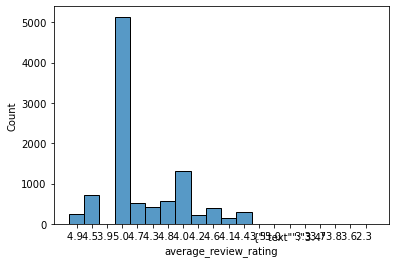

In [29]:
sns.histplot(data['average_review_rating'])

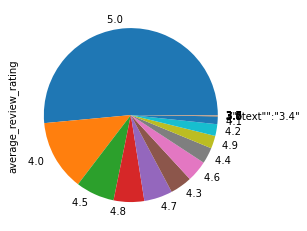

In [30]:
data['average_review_rating'].value_counts().plot.pie()
plt.show()

In [31]:
data['price'].value_counts()

9.99      189
4.99      140
14.99     132
5.99      126
6.99      126
         ... 
41.00       1
124.95      1
82.02       1
37.73       1
21.20       1
Name: price, Length: 2626, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

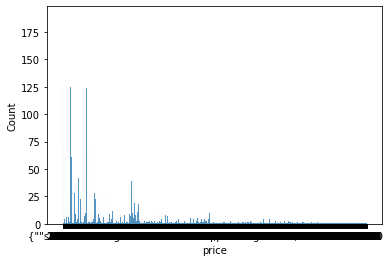

In [38]:
sns.histplot(data['price'])

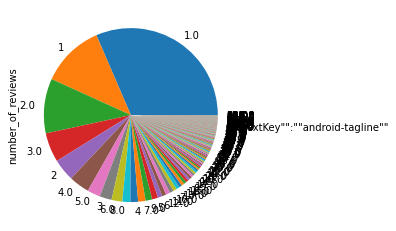

In [42]:
data['number_of_reviews'].value_counts().plot.pie()
plt.show()

{'Hornby 2014 Catalogue': 0, 'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke': 1, 'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY': 2, 'Defiance Lawkeeper Metal Badge Prop Replica': 3, 'Justice League of America Series 3 Green Lantern Action Figure': 4, 'Star Wars 1/72 Y-Wing Starfighter': 5}


<AxesSubplot:xlabel='product_name', ylabel='Count'>

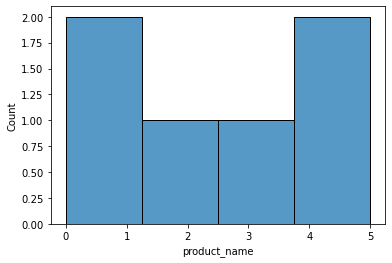

In [41]:
print(product_name_dict)
sns.histplot(data['product_name'])

{'Hornby 2014 Catalogue': 0, 'FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke': 1, 'CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY': 2, 'Defiance Lawkeeper Metal Badge Prop Replica': 3, 'Justice League of America Series 3 Green Lantern Action Figure': 4, 'Star Wars 1/72 Y-Wing Starfighter': 5}


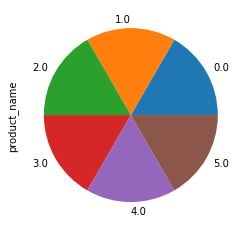

In [28]:
print(product_name_dict)
data['product_name'].value_counts().plot.pie()
plt.show()

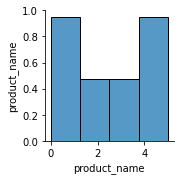

In [43]:
sns.pairplot(data=data)

# Bivariate Analysis

<AxesSubplot:xlabel='average_review_rating', ylabel='product_name'>

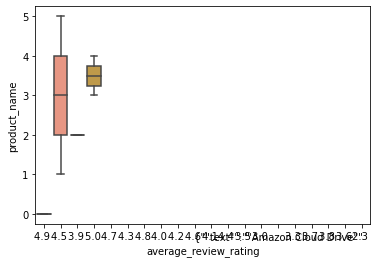

In [31]:
sns.boxplot(x=data['average_review_rating'], y=data['product_name'])

In [32]:
data.groupby('product_name')['average_review_rating'].describe()

,count,unique,top,freq
product_name,,,,
0.0,1,1,4.9,1
1.0,1,1,4.5,1
2.0,1,1,3.9,1
3.0,1,1,5.0,1
4.0,1,1,5.0,1
5.0,1,1,4.5,1


<AxesSubplot:xlabel='number_of_reviews', ylabel='product_name'>

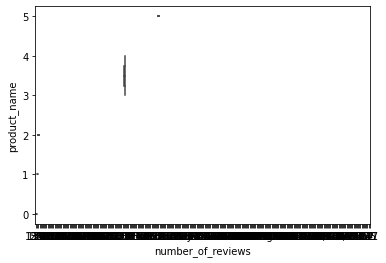

In [33]:
sns.boxplot(x=data['number_of_reviews'], y=data['product_name'])

<AxesSubplot:xlabel='price', ylabel='product_name'>

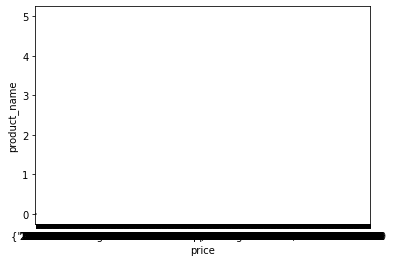

In [10]:
sns.boxplot(x=data['price'], y=data['product_name'])

In [12]:
data.groupby('product_name')['price'].describe()

,count,unique,top,freq
product_name,,,,
0.0,1,1,3.42,1
1.0,1,1,16.99,1
2.0,1,1,9.99,1
3.0,1,1,43.99,1
4.0,1,1,49.81,1
5.0,1,1,21.20,1


# Multivariate Analysis

,product_name
product_name,1.0


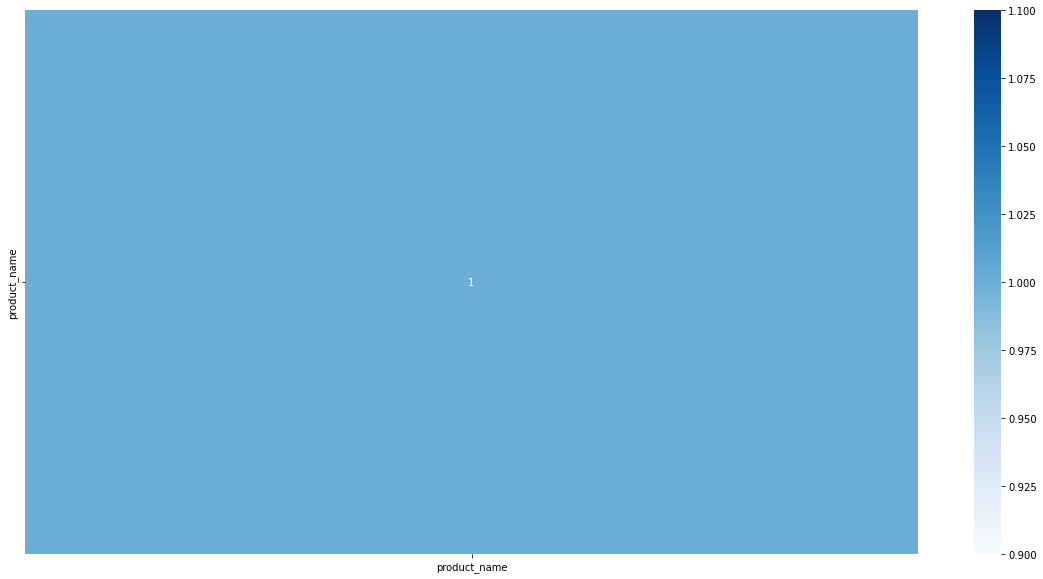

In [37]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c

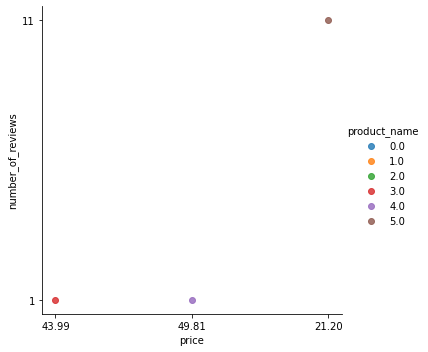

In [14]:
sns.lmplot(x='price', y='number_of_reviews', hue='product_name', 
           data=data, 
           fit_reg=False)

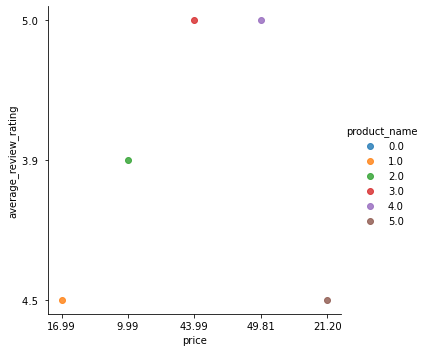

In [16]:
sns.lmplot(x='price', y='average_review_rating', hue='product_name', 
           data=data, 
           fit_reg=False)